<a href="https://colab.research.google.com/github/itumor/colab/blob/master/Algorithmic_Trading_Strategy_Using_MACD_%26_Python_amz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stock ='AMZN'
startdate = '2020-01-01'
enddate = datetime.today().strftime('%Y-%m-%d')

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400,3019.790039
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049


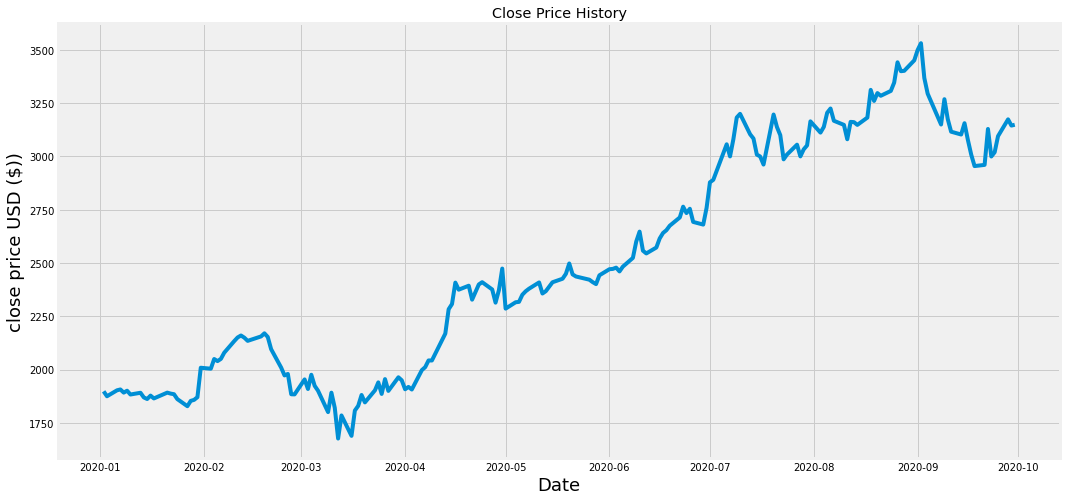

In [4]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()

In [5]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

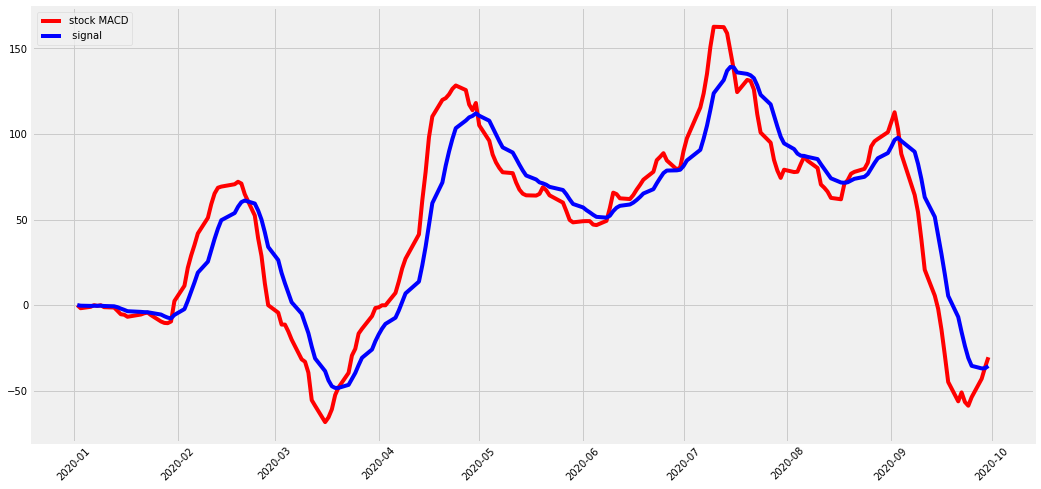

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df.index, MACD, label = 'stock MACD', color='red')
plt.plot(df.index, signal, label = ' signal', color='blue' )
plt.xticks(rotation = 45 )
plt.legend(loc='upper left')
plt.show()

In [7]:
df['MACD']  = MACD
df['signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,signal
Date,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0.000000,0.000000
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-1.837952,-0.367590
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,-1.030556,-0.500183
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,-0.068745,-0.413896
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,-0.502214,-0.431559
...,...,...,...,...,...,...,...,...
2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400,3019.790039,-58.862426,-30.938741
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883,-53.885134,-35.528020
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049,-43.075844,-37.037585


In [8]:
def buy_sell(signal):
   Buy = []
   Sell = []
   flag = -1

   for i in range(0, len(signal)):
     if signal['MACD'][i] > signal['signal'][i]:
       Sell.append(np.nan)
       if flag != 1:
         Buy.append(signal['Close'][i])
         flag = 1
       else:
           Buy.append(np.nan)
     elif signal['MACD'][i] < signal['signal'][i]:
       Buy.append(np.nan)
       if flag != 0:
         Sell.append(signal['Close'][i])
         flag = 0 
       else:
           Sell.append(np.nan)
     else:
       Buy.append(np.nan)
       Sell.append(np.nan)

   return (Buy, Sell)


In [9]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_signal_Price'] = a[1]

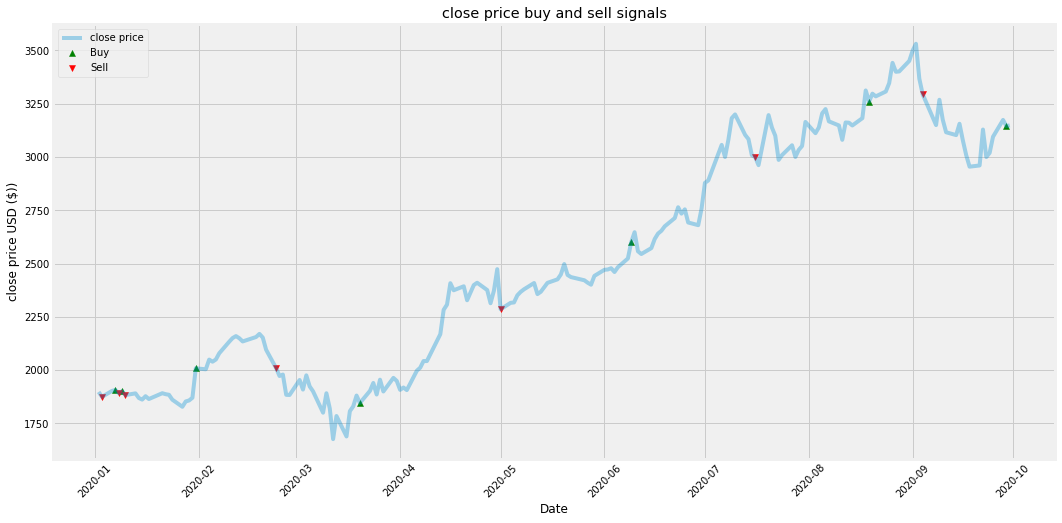

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1 )
plt.scatter(df.index, df['Sell_signal_Price'], color='red', label='Sell', marker='v' , alpha = 1 )
plt.plot(df['Close'],label='close price', alpha = 0.35)
plt.title('close price buy and sell signals')
plt.xlabel('Date')
plt.ylabel('close price USD ($))')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45 )
plt.show()